# Data Visualization
# 1. Seaborn


# Choose types of plot to describe the data
**Trends** - A trend is defined as a pattern of change.
- sns.lineplot - Line charts are best to show trends over a period of time, and multiple lines can be used to show trends in more than one group.

**Relationship** - There are many different chart types that you can use to understand relationships between variables in your data.
- sns.barplot - Bar charts are useful for comparing quantities corresponding to different groups.
- sns.heatmap - Heatmaps can be used to find color-coded patterns in tables of numbers.
- sns.scatterplot - Scatter plots show the relationship between two continuous variables; if color-coded, we can also show the relationship with a third categorical variable.
- sns.regplot - Including a regression line in the scatter plot makes it easier to see any linear relationship between two variables.
- sns.lmplot - This command is useful for drawing multiple regression lines, if the scatter plot contains multiple, color-coded groups.
- sns.swarmplot - Categorical scatter plots show the relationship between a continuous variable and a categorical variable.

**Distribution** - We visualize distributions to show the possible values that we can expect to see in a variable, along with how likely they are.
- sns.histplot - Histograms show the distribution of a single numerical variable.
- sns.kdeplot - KDE plots (or 2D KDE plots) show an estimated, smooth distribution of a single numerical variable (or two numerical variables).
- sns.jointplot - This command is useful for simultaneously displaying a 2D KDE plot with the corresponding KDE plots for each individual variable.

绘制基本格式：plot(x=, y=, data=,)

改变plot风格：`sns.set_style('')`
Seaborn 提供了不同的绘图风格，允许你根据你的喜好和需要来定制图形的外观。通过 sns.set_style，你可以选择不同的风格，例如 "darkgrid"、"whitegrid"、"dark"、"white" 和 "ticks"。

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 创建一个示例 DataFrame
df = pd.DataFrame({
    'Age': [25, 30, 22, 35, 28, 40, 32, 45, 27, 38],
    'Income': [50000, 60000, 45000, 75000, 60000, 80000, 70000, 90000, 55000, 85000],
    'Gender': ['Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Height': [175, 163, 180, 160, 168, 175, 178, 162,190, 159],
    'City': ['New York', 'Los Angeles', 'Chicago', 'San Francisco', 'Boston', 'Miami', 'Dallas', 'Seattle', 'Denver', 'Atlanta']
})
df.head()

,Age,Income,Gender,Height,City
0,25,50000,Male,175,New York
1,30,60000,Female,163,Los Angeles
2,22,45000,Male,180,Chicago
3,35,75000,Male,160,San Francisco
4,28,60000,Female,168,Boston


## 1. 散点图（scatter plot）
- `scatterplot(x=, y=, data=, hue= )`它通常用于两个数值变量之间的关系，可以直接在数值坐标轴上绘制散点，而不涉及类别数据。
hue：它用于指定一个分类变量，以根据该变量的不同类别对数据进行分组和着色。这通常用于创建具有多个子组的图表，其中每个子组以不同颜色或样式表示。\
注意，plot中如果只传入一个参数data=dataframe，而不指定x和y，则plot会根据所有列进行绘制
- `swarmplot()` 也是绘制散点图，它在类别数据上创建分布散点图，尤其适用于显示分类变量和数值变量之间的关系。每个数据点根据其值被分散开来，以避免重叠。


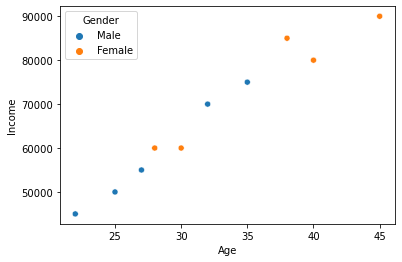

In [12]:
sns.scatterplot(x="Age", y="Income", data=df, hue="Gender")
plt.show()


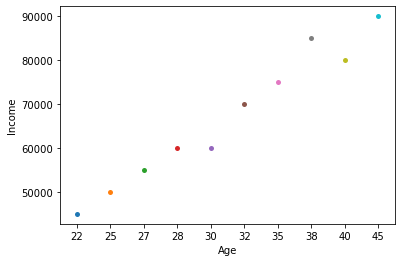

In [11]:
sns.swarmplot(x='Age',y='Income',data=df)
plt.show()

-  Use the `lmplot()` to make plot for line-regression model\
    lmplot will plot a scatter with regression line

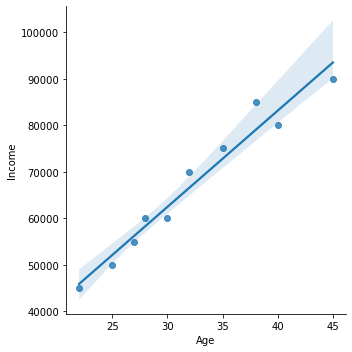

In [10]:
sns.lmplot(x='Age',y='Income',data=df)
plt.show()

# 2. 箱线图（box plot） `boxplot()`

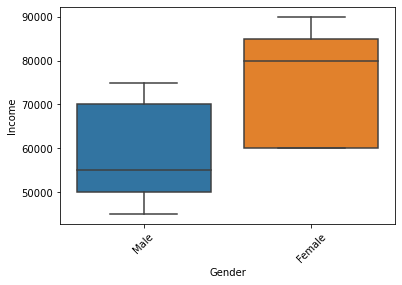

In [31]:
sns.boxplot(x="Gender", y="Income", data=df)
plt.xticks(rotation=45)
plt.show()


# 3. 直方图（Histogram） `histplot()`  
参数 `kde=True` 表示同时显示核密度估计曲线。参数 `bins` 控制直方图的分组数量。你可以根据需要调整 bins 的值来更精确地控制直方图的外观。

`kdeplot(data=, shade=T/F)` 绘制核密度估计图（Kernel Density Estimation，KDE）的函数。核密度估计图用于估计数值数据的概率密度函数，并可视化数据的分布。

`jointplot(x=, y=, data=, kind= 'scatter')`用于绘制双变量关系的函数。它通常用于探索两个数值变量之间的关系，并提供了多种图形选项，包括散点图、核密度估计图和回归拟合线。

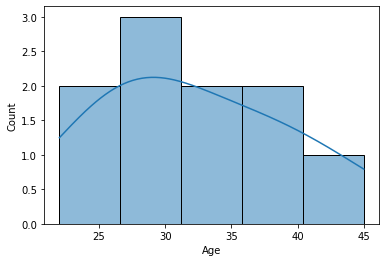

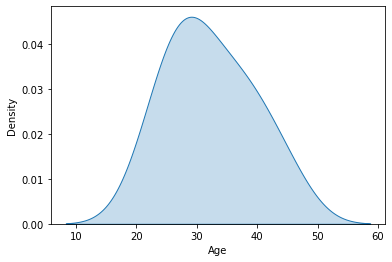

E:\Programming\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


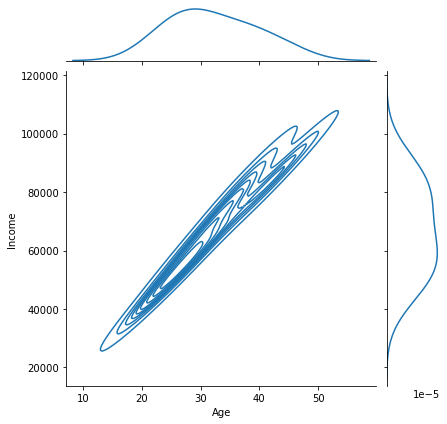

In [19]:
sns.histplot(df["Age"], kde=True, bins=5)
plt.show()

sns.kdeplot(df['Age'],shade=True)
plt.show()

sns.jointplot(df['Age'],df['Income'],kind='kde')
plt.show()

# 4. 折线图（Line chart） `lineplot()`

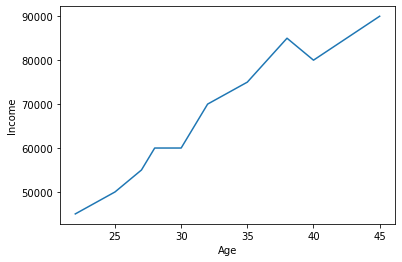

In [28]:
sns.lineplot(x=df.Age,y=df.Income)
plt.show()


# 5. 柱状图（Bar Chart） `barplot()`

Seaborn 的 `countplot` 和 `barplot` 都是用于展示类别变量分布的条形图，但它们之间有一个关键的区别：

1. **countplot**:
   - `countplot` 用于显示每个类别级别的观察数量。
   - 它本质上是对数据集进行计数，并显示每个类别变量的计数结果。
   - 使用 `countplot` 时，你只需要指定类别变量即可，只需要给定x（竖直条形）或y（水平挑选），Seaborn 自动为你计算每个类别的数量。
   - 如果需要排序，可以指定x或y以后，再指定order=，order=可以是一个list，也可以是一个pandas series，用于指定排序顺序。

   例如：
   ```python
   sns.countplot(x='gender', data=df)
   ```
   这将为 `df` 数据帧中 `gender` 列的每个类别（如 'male', 'female'）显示计数条形图。

2. **barplot**:
   - `barplot` 显示的是某个数值变量在类别级别上的估计值（默认为平均值）。
   - 你需要指定类别变量和数值变量。如果不指定数值变量（y），则默认为计算每个类别的平均值。
   - 使用 `barplot` 时，你可以自定义聚合函数，比如总和、平均值、中位数等。

   例如：
   ```python
   sns.barplot(x='gender', y='salary', data=df)
   ```
   这将为 `df` 数据帧中 `gender` 列的每个类别显示 `salary` 的平均值条形图。

总结来说，`countplot` 用于简单的计数展示，而 `barplot` 用于显示数值变量的某种统计估计值，并允许自定义聚合函数。如果你只关心计数，`countplot` 是一个更直接和方便的选择。如果你需要展示更复杂的统计信息，`barplot` 会是更好的选择。

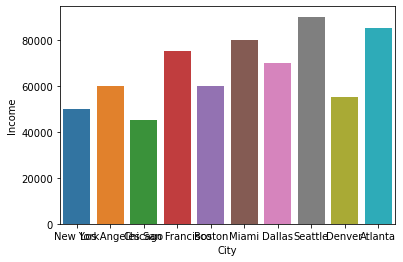

In [36]:
# 指定类别x和数值y
sns.barplot(x='City',y='Income',data=df)
plt.show()

  category     value
0        A  0.509624
1        B  0.055715
2        A  0.451159
3        B  0.019988
4        B  0.441711


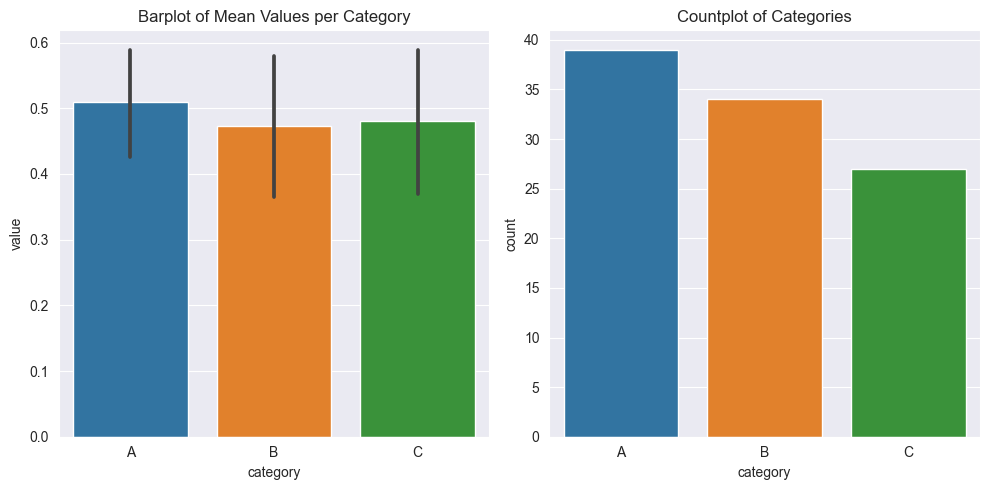

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 生成示例数据
np.random.seed(0)
data = pd.DataFrame({
    'category': np.random.choice(['A', 'B', 'C'], 100),
    'value': np.random.rand(100)
})
print(data.head())

# 使用 barplot 展示各类别的平均值
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='category', y='value', data=data)
plt.title('Barplot of Mean Values per Category')

# 使用 countplot 展示各类别的计数
plt.subplot(1, 2, 2)
sns.countplot(x='category', data=data)
plt.title('Countplot of Categories')

plt.tight_layout()
plt.show()

# 6. 热图（Heatmap） `heatmap()`
参数 annot=T/F 表示是否要在每个单元格上添加数值标签，cmap="YlGnBu" 参数指定了颜色映射，以调整颜色。\
    注意，热图一般需要进行相关系数计算，用相关矩阵进行绘制\
    当data均是数值型，可以直接传入heatmap而不用手动计算corMatrix

在 Python 中，可以使用多个库来计算相关系数，主要取决于你正在处理的数据类型和你的具体需求。以下是一些常见的方法：

### 1. 使用 Pandas 库
如果你的数据存储在 Pandas 的 DataFrame 或 Series 中，可以使用 `corr` 方法来计算相关系数。这适用于计算两个变量之间的相关性，或者计算 DataFrame 中所有变量之间的相关性。

```python
import pandas as pd

# 假设 df 是一个包含多列数据的 DataFrame
correlation_matrix = df.corr()

# 计算两个特定列之间的相关系数
df[[col1, col2]].corr()

```

`corr` 方法默认计算皮尔逊相关系数，但也可以计算斯皮尔曼或肯德尔相关系数。可以在 `corr` 方法中使用 `method=pearson`、`method=spearman` 或 `method=kendall` 来指定相关系数的计算方法。

### 2. 使用 NumPy 库
NumPy 提供了 `corrcoef` 函数，它可以用来计算两个或多个变量之间的相关系数矩阵。

```python
import numpy as np

# 假设 x 和 y 是 NumPy 数组
correlation_matrix = np.corrcoef(x, y)
```

这将返回一个相关系数矩阵，其中 `correlation_matrix[0, 1]` 和 `correlation_matrix[1, 0]` 代表 x 和 y 之间的相关系数。

### 3. 使用 SciPy 库
SciPy 提供了更多统计函数，包括计算相关系数。它在处理皮尔逊和斯皮尔曼相关系数时特别有用。

```python
from scipy.stats import pearsonr, spearmanr

# 计算皮尔逊相关系数
pearson_corr, _ = pearsonr(x, y)

# 计算斯皮尔曼相关系数
spearman_corr, _ = spearmanr(x, y)
```

在这些函数中，`x` 和 `y` 应该是等长的数值列表或数组。

选择哪种方法取决于你的具体情况和你使用的数据结构。对于 DataFrame 数据，Pandas 的 `corr` 方法非常方便。对于数组类型的数据，NumPy 和 SciPy 提供了灵活的计算方式。

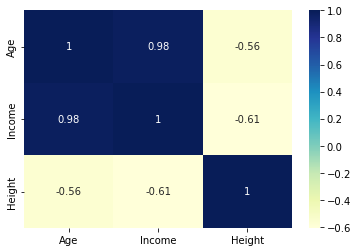

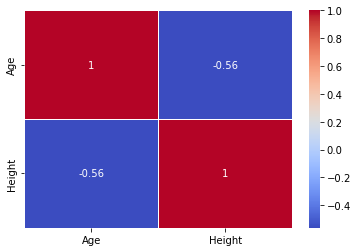

In [59]:
# 计算相关系数矩阵
# 注意，直接对整个dataframe计算corMatrix时候，只会自动得到数值型变量的相关系数
cor_matrix = df.corr()  #仅包括 Age，Height， Income

sns.heatmap(data=cor_matrix,annot=True,cmap='YlGnBu')
plt.show()


# 选择特定列进行绘制
selected_df = df[['Age', 'Height']]

# 计算相关性矩阵
correlation_matrix = selected_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()



# <big>2. Matplotlib

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
%matplotlib inline

## 1. Line Chart `plt.plot()`



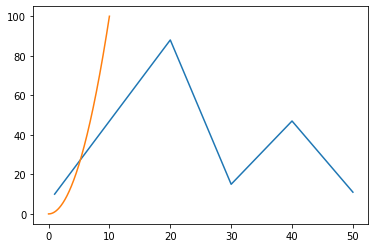

In [12]:
# straight line
x = [1, 20, 30, 40, 50]
y = [10, 88, 15, 47, 11]
plt.plot(x,y)

# curve line
x = np.linspace (0, 10, 1000) #Return evenly spaced numbers over a specified interval.
y = np.power(x, 2)
plt.plot(x, y)


## 2. Scatter Chart `plt.scatter()`



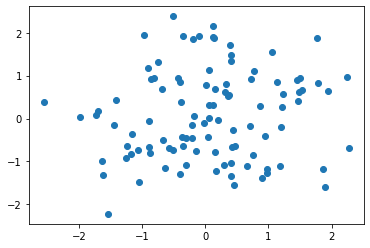

In [33]:
rng = np.random.RandomState(0) #设置随机种子
x = rng.randn(100) #return a sample (or samples) from the “standard normal” distribution.
y = rng.randn(100)
plt.scatter(x, y)

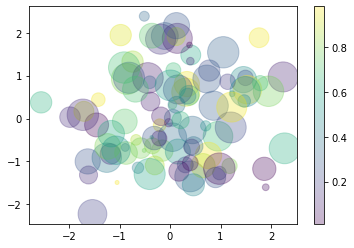

In [34]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

## 3. Bar Chart `plt.bar()`

<BarContainer object of 5 artists>

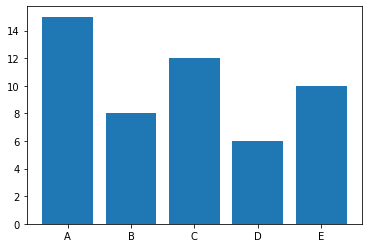

In [16]:
categories = ['A', 'B', 'C', 'D', 'E']
values = [15, 8, 12, 6, 10]
plt.bar(categories, values)

## 4. Pie Chart `plt.pie(sizes, labels=, colors=， autopct=)`

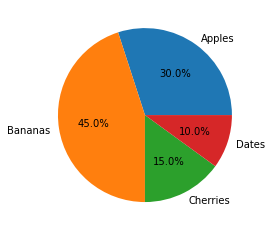

In [18]:
labels = ['Apples', 'Bananas', 'Cherries', 'Dates']
sizes = [30, 45, 15, 10]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

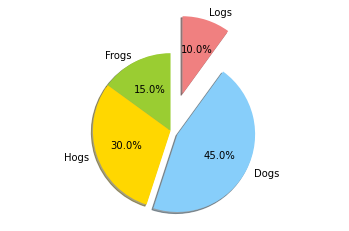

In [37]:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1, 0.5) #用于设置突出显示的part，对应第三个dogs和第四个logs部分进行突出显示，偏移量分别0.1和0.5

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()

## Formating Graph
### 1. Styling Lines and Markers

The `plt.plot` function supports many arguments for styling lines and markers:

- **`color` 或 `c`：** 设置线条或标记的颜色（[支持的颜色名称](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)）
- **`linestyle` 或 `ls`：** 选择线条的样式，可以是实线（'-'）、虚线（'--'）、点线（':'）等。
- **`linewidth` 或 `lw`：** 设置线条的宽度，指定一个数字。
- **`markersize` 或 `ms`：** 设置标记的大小，指定一个数字。
- **`markeredgecolor` 或 `mec`：** 设置标记的边缘颜色。
- **`markeredgewidth` 或 `mew`：** 设置标记的边缘宽度，指定一个数字。
- **`markerfacecolor` 或 `mfc`：** 设置标记的填充颜色。
- **`alpha`：** 设置图形的透明度，取值范围从0到1，0表示完全透明，1表示完全不透明。



Check out the documentation for `plt.plot` to learn more: [https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) .
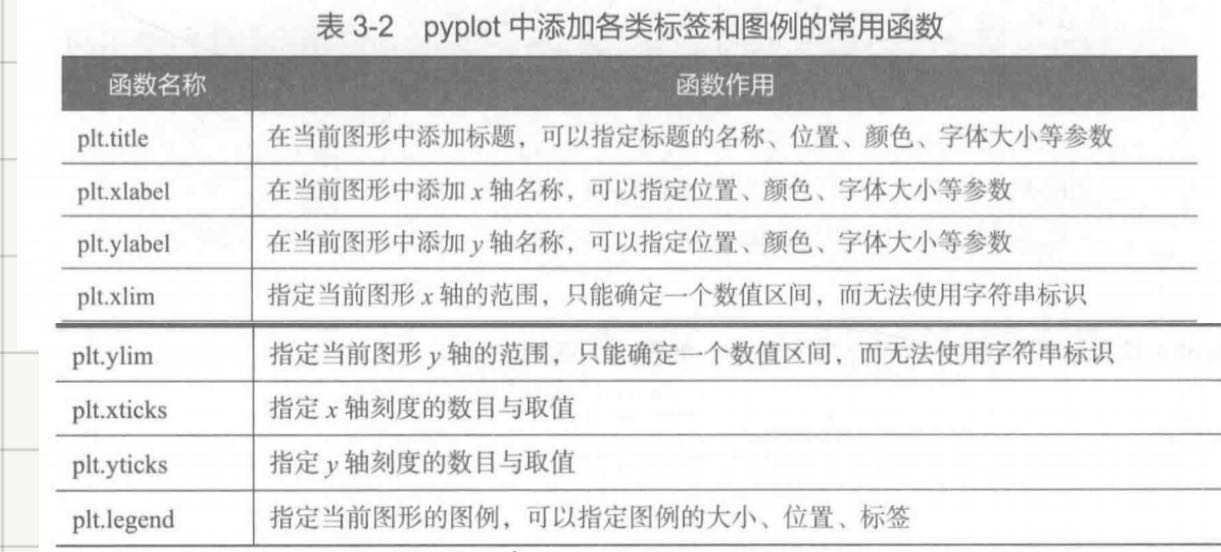


plt.plot(marker='')可以为线条添加形状，具体参考：https://matplotlib.org/3.1.1/api/markers_api.html .

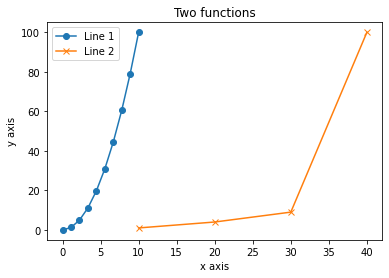

In [38]:
x = np.linspace (0, 10, 10)
y = np.power(x, 2)
plt.plot (x, y, marker='o')
plt.plot([10, 20, 30, 40], [1, 4, 9, 100], marker='x')

plt.xlabel('x axis')
plt.ylabel('y axis')

plt.title("Two functions")
plt.legend(['Line 1', 'Line 2'])

### 2. Subplot
绘图画布可以使用subplot命令分割成子图
- `subplot(nrows, ncols, plot_number)`
    - nrows - 绘图图中的行数
    - ncols - 绘图图中的列数
    - plot_number- 应激活的子图。plot_number从1开始，首先在行上递增，最大值为nrows * ncols。


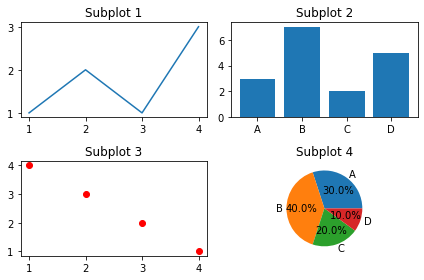

In [39]:
# 创建一个2x2的图形布局，并激活第一个子图
plt.subplot(2, 2, 1)
plt.plot([1, 2, 3, 4], [1, 2, 1, 3])
plt.title('Subplot 1')

# 激活第二个子图
plt.subplot(2, 2, 2)
plt.bar(['A', 'B', 'C', 'D'], [3, 7, 2, 5])
plt.title('Subplot 2')

# 激活第三个子图
plt.subplot(2, 2, 3)
plt.scatter([1, 2, 3, 4], [4, 3, 2, 1], c='red')
plt.title('Subplot 3')

# 激活第四个子图
plt.subplot(2, 2, 4)
plt.pie([30, 40, 20, 10], labels=['A', 'B', 'C', 'D'], autopct='%1.1f%%')
plt.title('Subplot 4')

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()

## 3. Using plt via object
1. 首先你可以创建一个图形对象（Figure类的实例）。图形对象表示整个图形，包含了所有的图表元素。
2. 在图形对象中，你可以添加坐标轴对象（Axes对象），通过调用Figure类的add_axes方法来实现。每个坐标轴对象代表一个绘图区域，你可以在这个区域上绘制图表。
3. 一旦你创建了图形和坐标轴对象，你可以通过对这些对象调用方法来修改图形的状态和绘制图表元素。这种方式让你可以更灵活地控制图形的各个方面。

`plt.figure()` 创建空白画布；\
`.add_axes([ ])` 对该画布添加坐标对象\
`.plot()` 进行绘制图像\
`.set_xlabel()` `.set_ylabel()` 设置坐标名称
`.set_title()` 设置图像标题


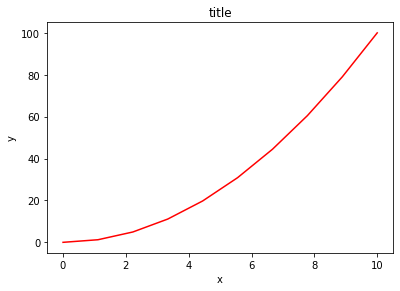

In [42]:
fig = plt.figure() #create new figure object 

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.plot(x, y, 'r') # plot red line

axes.set_xlabel('x') # set xlabel
axes.set_ylabel('y') # set ylabel
axes.set_title('title'); # set title